In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.linalg import eig
from scipy.linalg import eigh
from numpy.random import uniform as uni

def it_v(XY1,i1,j1,eps_r1,l1):
  return 1/(eps_r1 *np.sqrt((XY1[i1]-XY1[j1])**2+l1**2))

def it_f(m2,dx2,psi2,XY2,eps_r2,l2):
  f_out = np.zeros(np.shape(psi2))
  for i2 in range(1,len(psi2[:,0])-1):
    for j2 in range(1,len(psi2[0,:])-1):
      f_out[i2,j2]=-(psi2[i2+1,j2]+psi2[i2-1,j2]+psi2[i2,j2+1]+psi2[i2,j2-1]-4*psi2[i2,j2])/(2*m2*dx2**2) + psi2[i2,j2]*it_v(XY2,i2,j2,eps_r2,l2)
  return f_out

def it_psi(psi3,f3,dtau3):
  return psi3-dtau3*f3

def it_norm(psi4,dx4):
  c4 = sum(sum(psi4**2*dx4**2))
  return psi4/np.sqrt(c4)

def hf_norm(psi4,dx4):
  c4 = sum(psi4**2*dx4)
  return psi4/np.sqrt(c4)


def it_e(psi5,f5,dx5):
  return sum(sum(psi5*f5*dx5**2))

def it_test(E06,E16,tol6):
  return np.abs((E16-E06)/E16)<tol6

def hf_f(psi7,XY7,dx7,eps_r7,l7):
  f1_out = np.zeros(len(psi7))
  for i7 in range(len(psi7)):
    for j7 in range(len(psi7)):
      f1_out[i7] += dx7* psi7[j7]**2 *it_v(XY7,i7,j7,eps_r7,l7)
  return f1_out


def hf_it_e(psi9,f9,dx9):
  return sum(psi9*f9*dx9)

def hf_h(psi11,m11,dx11):
  h11 = np.zeros(np.shape(psi11))
  for i11 in range(1,len(psi11)-1):
      h11[i11]=-(psi11[i11-1]+psi11[i11+1]-2*psi11[i11])/(2*m11*dx11**2)
  return h11


def hf_it(psi8,a8,tol8,J8):
  eps_r8 = 12.5
  l8=10/0.052918
  XY8 = np.linspace(-a,a,41)
  m8=0.067
  test8 = 0
  dx8 = 2*a8/(40)
  dtau8 = m8*dx8**2*0.4
  E8=0
  while test8==0:
#     f8 = hf_h(psi8,m8,dx8) + hf_f(psi8,XY8,dx8,eps_r8,l8)*psi8
    f8 = hf_h(psi8,m8,dx8) + J8*psi8
    psi_next8 = it_psi(psi8,f8,dtau8)
    psi_next8 = hf_norm(psi_next8,dx8)
    E_next8 = hf_it_e(psi_next8,f8,dx8)
    test8 = it_test(E8,E_next8,tol8)
    if not test:
      psi8 = psi_next8
    E8=E_next8
  return E8, psi8


def hf_E(psi10,eps10,dx10,J10):
  E_int10 = dx10 *sum(psi10**2 *J10)
  return 2*eps10 - E_int10




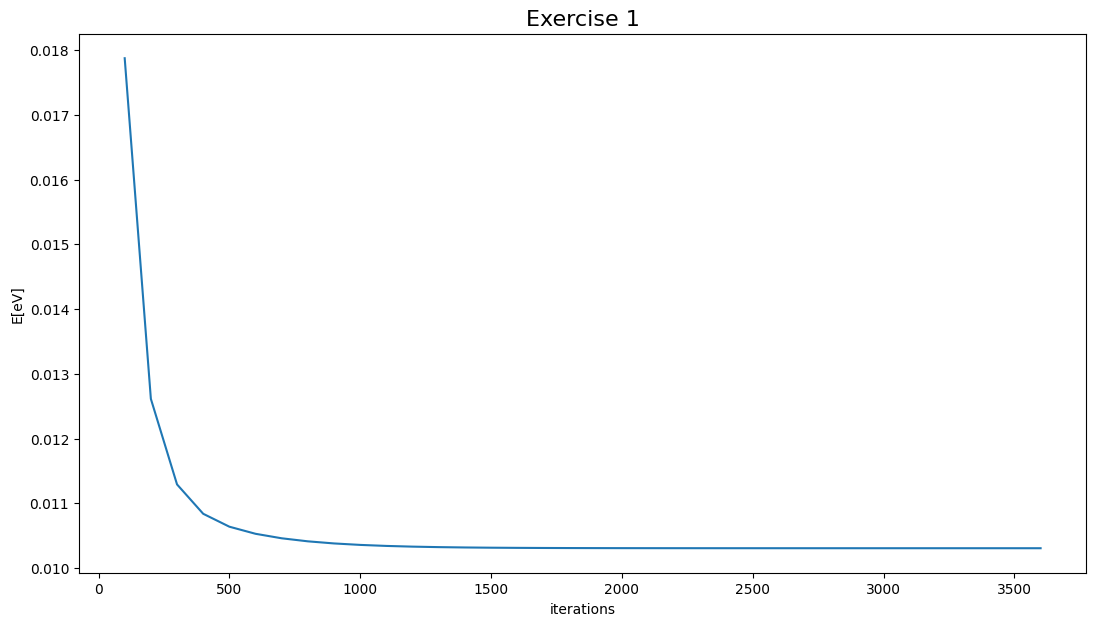

In [ ]:
#zadanie 1
Eh = 27.211
n=41
l=10/0.052918
m=0.067
eps_r = 12.5

a=30/0.052918
dx = 2*a/(n-1)
XY = np.linspace(-a,a,n)
dtau = m*dx**2*0.4

tol = 1e-9

psi_it = np.zeros((n,n))
psi_it[1:n-1,1:n-1] = uni(-1,1,size=(n-2,n-2))
E = 0
test=0
iters=[]
Energies=[]
tau=0
numerator = 0
while test==0:
  f=it_f(m,dx,psi_it,XY,eps_r,l)
  psi_next = it_psi(psi_it,f,dtau)
  psi_next = it_norm(psi_next,dx)
  E_next =it_e(psi_next,f,dx)

  test = it_test(E,E_next,tol)
  if not test:
    psi_it=psi_next
  numerator+=1
  tau+=dtau
  E=E_next
  if numerator%100 ==0:
    iters=np.append(iters,numerator)
    Energies=np.append(Energies,E)



Energies *=Eh

fig = plt.figure(figsize=(13,7))  #konfiguracja wykresu
ax = fig.add_subplot(111)
ax.set_ylabel('E[eV]')
ax.set_xlabel(r'iterations')
ax.set_title(r'Exercise 1', fontsize = 16)




ax.plot(iters, Energies) #zwykły plot

plt.show()

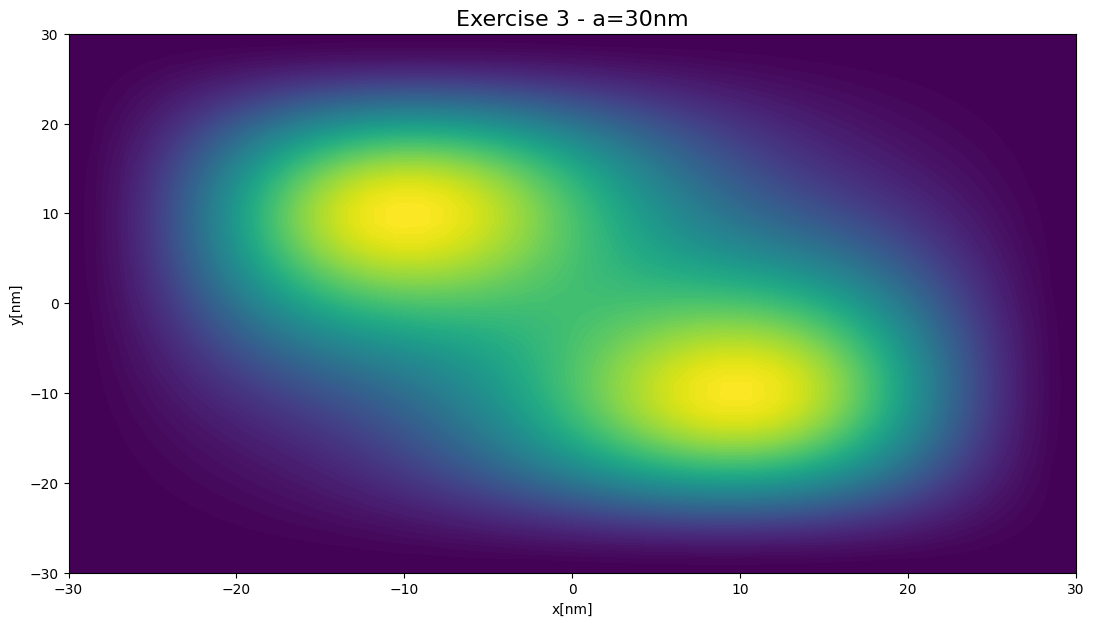

In [ ]:
XY*=0.052918
fig = plt.figure(figsize=(13,7))  #konfiguracja wykresu
ax = fig.add_subplot(111)
ax.set_ylabel('y[nm]')
ax.set_xlabel(r'x[nm]')
ax.set_title(r'Exercise 3 - a=30nm', fontsize = 16)

plt.contourf(XY,XY,psi_it**2,100)


plt.show()

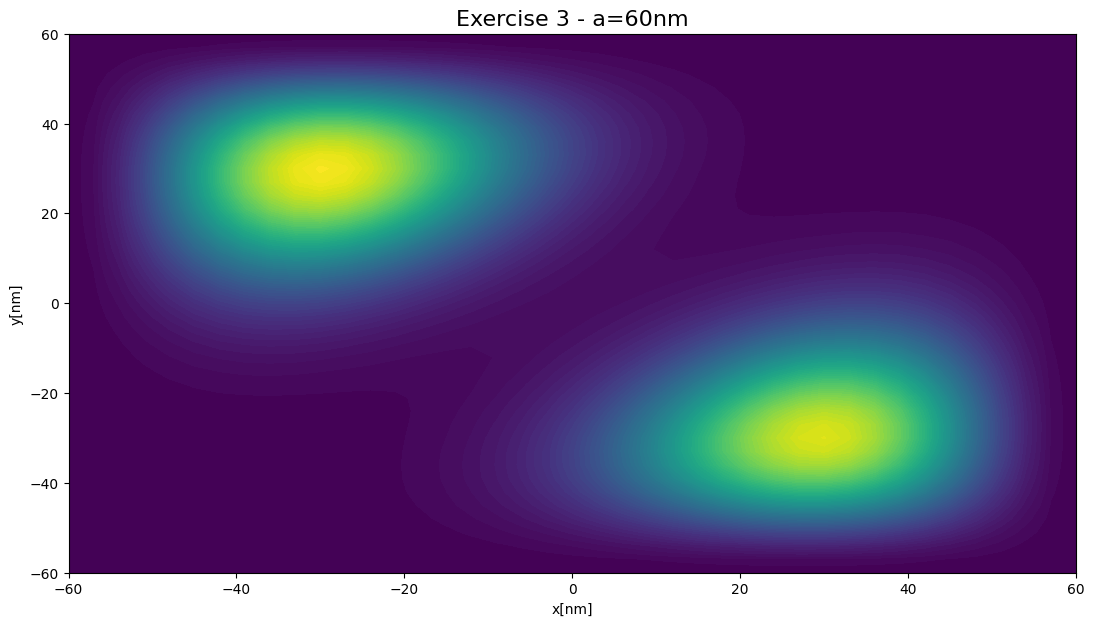

In [ ]:
#zadanie 1
Eh = 27.211
n=41
l=10/0.052918
m=0.067
eps_r = 12.5

a=60/0.052918
dx = 2*a/(n-1)
XY = np.linspace(-a,a,n)
dtau = m*dx**2*0.4

tol = 1e-9

psi_it = np.zeros((n,n))
psi_it[1:n-1,1:n-1] = uni(-1,1,size=(n-2,n-2))
E = 0
test=0
iters=[]
Energies=[]
tau=0
numerator = 0
while test==0:
  f=it_f(m,dx,psi_it,XY,eps_r,l)
  psi_next = it_psi(psi_it,f,dtau)
  psi_next = it_norm(psi_next,dx)
  E_next =it_e(psi_next,f,dx)

  test = it_test(E,E_next,tol)
  if not test:
    psi_it=psi_next
  numerator+=1
  tau+=dtau
  E=E_next
  if numerator%100 ==0:
    iters=np.append(iters,numerator)
    Energies=np.append(Energies,E)


XY*=0.052918
fig = plt.figure(figsize=(13,7))  #konfiguracja wykresu
ax = fig.add_subplot(111)
ax.set_ylabel('y[nm]')
ax.set_xlabel(r'x[nm]')
ax.set_title(r'Exercise 3 - a=60nm', fontsize = 16)

plt.contourf(XY,XY,psi_it**2,100)


plt.show()

In [ ]:
#zadanie 2
Eh = 27.211
n=41
l=10/0.052918
m=0.067
eps_r = 12.5

As=np.linspace(30/0.052918,60/0.052918,7)
tol = 1e-9



Energies_it=np.zeros(7)
tau=0

for a in As:
  dx = 2*a/(n-1)
  XY = np.linspace(-a,a,n)
  dtau = m*dx**2*0.4
  psi_it = np.zeros((n,n))
  psi_it[1:n-1,1:n-1] = uni(-1,1,size=(n-2,n-2))
  test=0
  E = 0
  while test==0:
    f=it_f(m,dx,psi_it,XY,eps_r,l)
    psi_next = it_psi(psi_it,f,dtau)
    psi_next = it_norm(psi_next,dx)
    E_next =it_e(psi_next,f,dx)

    test = it_test(E,E_next,tol)
    if not test:
      psi_it=psi_next
    tau+=dtau
    E=E_next
  Energies_it[np.where(As==a)[0][0]]=E



Energies_it *=Eh


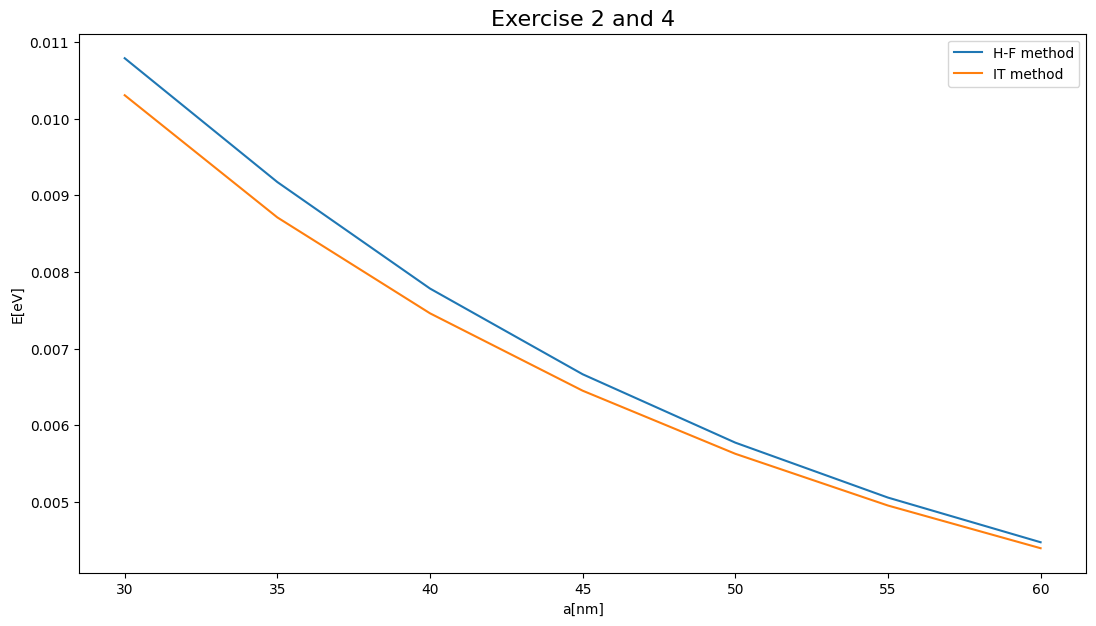

In [ ]:
#zadanie 4


Eh = 27.211
n=41
l=10/0.052918
m=0.067
eps_r = 12.5

As=np.linspace(30/0.052918,60/0.052918,7)
tol = 1e-9



Energies_hf=np.zeros(len(As))

for a in As:
  dx = 2*a/(n-1)
  XY = np.linspace(-a,a,n)
  dtau = m*dx**2*0.4
  psi_hf = np.zeros(n)
  psi_hf[1:n-1] = uni(-1,1,size=(n-2))
  test=0
  E = 0
  h=np.zeros(n)
  while test==0:
    J1=hf_f(psi_hf,XY,dx,eps_r,l)

    eps_1,psi_next = hf_it(psi_hf,a,tol,J1)

    E_next = hf_E(psi_next,eps_1,dx,J1)

    test = it_test(E,E_next,tol)
    if not test:
      psi_hf=psi_next
    E=E_next
  Energies_hf[np.where(As==a)[0][0]]=E



Energies_hf *=Eh
As*=0.052918

fig = plt.figure(figsize=(13,7))  #konfiguracja wykresu
ax = fig.add_subplot(111)
ax.set_ylabel('E[eV]')
ax.set_xlabel(r'a[nm]')
ax.set_title(r'Exercise 2 and 4', fontsize = 16)

ax.plot(As, Energies_hf,label='H-F method') #zwykły plot
ax.plot(As, Energies_it,label='IT method') #zwykły plot

plt.legend()
plt.show()